<h1 style="text-align:center;color:black"> House Prices:Advanced Regression Techniques</h1>

<img src="https://image.shutterstock.com/image-photo/dreaming-buying-one-those-colorful-260nw-145389406.jpg"
     style="width:1000px;height:250px;">

# Import Libraries 

In [1]:
#Numerical and Data Manipulation 
import numpy as np
import pandas as pd

# Importing Visualization library
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import seaborn as sns

#Plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

import plotly.io as pio
pio.templates.default = "gridon"

# Subplots 
from plotly.subplots import make_subplots

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")


# Import Warning 
import warnings
warnings.filterwarnings("ignore")


## 2. Import Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Shape of Training Dataset:{} ".format(train.shape))
print("Shape of Test Dataset:{} ".format(test.shape))

Shape of Training Dataset:(1460, 81) 
Shape of Test Dataset:(1459, 80) 


In [3]:
pd.set_option("display.max_columns",81)
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.skew().sort_values(ascending=False).iloc[0:10] # this is the top skewed values in the data set 
# len 38

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
dtype: float64

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train.shape

(1460, 81)

## 3.  Finding Missing Values 

In [9]:
temp = list(train.isnull().sum())

col_type = list(train.dtypes)
lst = []
i=0
for col in train.columns:
    insert_lst= [col,col_type[i], temp[i]]
    lst.append(insert_lst)
    i+=1
    
train_na = pd.DataFrame(data=lst, columns=["Columns_Name", "Data_Types","Missing_Values"])

In [10]:
sum(train.isna().any()), sum(test.isna().any())

(19, 33)

In [11]:
train_na[train_na["Missing_Values"]>0].sort_values(by="Missing_Values", 
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap="Reds")


In [12]:
feature_to_drop = ["PoolQC", "MiscFeature","PoolArea","Alley", "Fence","Id"]

train.drop(feature_to_drop,axis=1, inplace=True)
test.drop(feature_to_drop, axis=1, inplace=True)

In [13]:
train.shape, test.shape

((1460, 75), (1459, 74))

In [14]:
int_to_object = ['MSSubClass', 'OverallQual', 'OverallCond', 'GarageCars']
for a1 in int_to_object:
    train[a1] = train[a1].astype(object)

In [15]:
cat_feat = [feature for feature in train.columns if train[feature].dtype == "O"]
year_feature = [feature for feature in train.columns if "Yr" in feature or "Year" in feature or "Mo" in feature]
num_feat = [feature for feature in train.columns if feature not in cat_feat + year_feature]

In [16]:
print("Lentgh of Categorical Feature {}.".format(len(cat_feat)))
train[cat_feat].head()

Lentgh of Categorical Feature 43.


MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageFinish GarageCars  \
0          Gd        Typ         NaN     Attchd          RFn          2   
1          TA        Typ          TA     Attchd          RFn          2   
2          Gd        Typ          TA     Attchd          RFn          2   
3          Gd        Typ          Gd     Detchd          Unf          3   
4          Gd        Typ          TA     Attchd          RFn          3   

  GarageQual GarageCond PavedDrive SaleType SaleCondition  
0         TA         TA          Y       WD        Normal  
1         TA         TA          Y       WD        Normal  
2         TA         TA          Y       WD        Normal  
3         TA         TA          Y       WD       Abnorml  
4         TA         TA          Y       WD        Normal

In [17]:
print("Lentgh of Numerical Feature {}.".format(len(num_feat)))
train[num_feat].head()

Lentgh of Numerical Feature 27.


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0         548           0           61              0          0   
1           1         460         298            0              0          0   
2           1         608           0           42              0          0   
3           1         642           0           35            272          0   
4           1         836         192           84              0          0   

   ScreenPorch  MiscVal  SalePrice  
0            0        0     208500  
1            0        0     181500  
2            0        0     223500  
3            0        0     140000  
4            0        0     250000

In [18]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

## 4. Filling Missing Values

### FirePlaceQu

In [19]:
train["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [20]:
train["FireplaceQu"].isna().sum()

690

In [21]:
train["FireplaceQu"].fillna(value="Gd",axis=0, inplace=True)
test["FireplaceQu"].fillna(value="Gd",axis=0, inplace=True)

In [22]:
train["FireplaceQu"].isna().sum()

0

### Lot Frontage

In [23]:
lot = [feature for feature in train.columns if "Lot" in feature]
lot

['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']

In [24]:
train[lot].isna().sum()

LotFrontage    259
LotArea          0
LotShape         0
LotConfig        0
dtype: int64

In [25]:
train[lot].mode()

LotFrontage  LotArea LotShape LotConfig
0         60.0     7200      Reg    Inside

In [26]:
train[train["LotFrontage"].isnull()][['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']]

LotFrontage  LotArea LotShape LotConfig
7             NaN    10382      IR1    Corner
12            NaN    12968      IR2    Inside
14            NaN    10920      IR1    Corner
16            NaN    11241      IR1   CulDSac
24            NaN     8246      IR1    Inside
...           ...      ...      ...       ...
1429          NaN    12546      IR1    Corner
1431          NaN     4928      IR1    Inside
1441          NaN     4426      Reg    Inside
1443          NaN     8854      Reg    Inside
1446          NaN    26142      IR1   CulDSac

[259 rows x 4 columns]

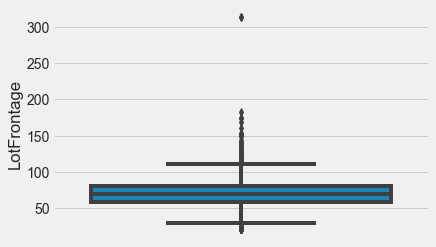

In [27]:
sns.boxplot(y=train["LotFrontage"])
plt.ylabel("LotFrontage")
plt.show()

In [28]:
train["LotFrontage"].fillna(train["LotFrontage"].median(),inplace=True)
test["LotFrontage"].fillna(test["LotFrontage"].median(),inplace=True)

In [29]:
train["LotFrontage"].isna().sum()

0

### Garage Type

In [30]:
train_na[train_na["Missing_Values"]>0].sort_values(by="Missing_Values", 
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap="Reds")


In [31]:
garage = ["GarageType","GarageFinish","GarageQual","GarageCond"]


In [32]:
train[garage].isna().sum(),train[garage].dtypes

(GarageType      81
 GarageFinish    81
 GarageQual      81
 GarageCond      81
 dtype: int64,
 GarageType      object
 GarageFinish    object
 GarageQual      object
 GarageCond      object
 dtype: object)

In [33]:
#pd.set_option("display.max_rows",81)
train[train["GarageFinish"].isnull()][['GarageType','GarageFinish','GarageCars','GarageArea',
                                     'GarageQual','GarageCond']]

GarageType GarageFinish GarageCars  GarageArea GarageQual GarageCond
39          NaN          NaN          0           0        NaN        NaN
48          NaN          NaN          0           0        NaN        NaN
78          NaN          NaN          0           0        NaN        NaN
88          NaN          NaN          0           0        NaN        NaN
89          NaN          NaN          0           0        NaN        NaN
...         ...          ...        ...         ...        ...        ...
1349        NaN          NaN          0           0        NaN        NaN
1407        NaN          NaN          0           0        NaN        NaN
1449        NaN          NaN          0           0        NaN        NaN
1450        NaN          NaN          0           0        NaN        NaN
1453        NaN          NaN          0           0        NaN        NaN

[81 rows x 6 columns]

In [34]:
train["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [35]:
garage

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [36]:
for col in garage:
    train[col].fillna("no_garage", inplace=True)
    test[col].fillna("no_garage", inplace=True) 

In [37]:
test["GarageCars"].fillna(test["GarageCars"].mode()[0], inplace=True)

In [38]:
train["GarageYrBlt"].fillna(2000, inplace=True)

In [39]:
test["GarageCars"].isna().sum()

0

In [40]:
test["GarageCars"].unique()

array([1., 2., 3., 0., 4., 5.])

In [41]:
train[garage].isna().sum()


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### Bsmt

In [42]:
null_value = train.isnull().sum()
null_value

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [43]:
bsmt_feature = [feature for feature in train.columns if "Bsmt" in feature ]
train[bsmt_feature].isna().sum(), train[bsmt_feature].dtypes

(BsmtQual        37
 BsmtCond        37
 BsmtExposure    38
 BsmtFinType1    37
 BsmtFinSF1       0
 BsmtFinType2    38
 BsmtFinSF2       0
 BsmtUnfSF        0
 TotalBsmtSF      0
 BsmtFullBath     0
 BsmtHalfBath     0
 dtype: int64,
 BsmtQual        object
 BsmtCond        object
 BsmtExposure    object
 BsmtFinType1    object
 BsmtFinSF1       int64
 BsmtFinType2    object
 BsmtFinSF2       int64
 BsmtUnfSF        int64
 TotalBsmtSF      int64
 BsmtFullBath     int64
 BsmtHalfBath     int64
 dtype: object)

In [44]:
bsmt_feature =  ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]

In [45]:
train[bsmt_feature].mode()

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
0       TA       TA           No          Unf          Unf

In [46]:
for col in bsmt_feature:
    train[col].fillna(value="NB", inplace=True)
    test[col].fillna(value="NB", inplace=True)    

In [47]:
test[bsmt_feature].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [48]:
bsmt_feature = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]

In [49]:
test[bsmt_feature].isna().sum(),test[bsmt_feature].dtypes

(BsmtFinSF1      1
 BsmtFinSF2      1
 BsmtUnfSF       1
 TotalBsmtSF     1
 BsmtFullBath    2
 BsmtHalfBath    2
 dtype: int64,
 BsmtFinSF1      float64
 BsmtFinSF2      float64
 BsmtUnfSF       float64
 TotalBsmtSF     float64
 BsmtFullBath    float64
 BsmtHalfBath    float64
 dtype: object)

In [50]:
for col in bsmt_feature:
    test[col].fillna(test[col].median(),inplace=True)

### MasVnr

In [51]:
train2 = train.copy()

In [52]:
mas = ['MasVnrArea', 'MasVnrType']
train2[train2["MasVnrArea"].isna()][['MasVnrArea', 'MasVnrType']] #.sum()

MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN

In [53]:
train2[mas].isna().sum(), test[mas].isna().sum()

(MasVnrArea    8
 MasVnrType    8
 dtype: int64,
 MasVnrArea    15
 MasVnrType    16
 dtype: int64)

In [54]:
train2["MasVnrArea"].describe()  # .loc["75%"]

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

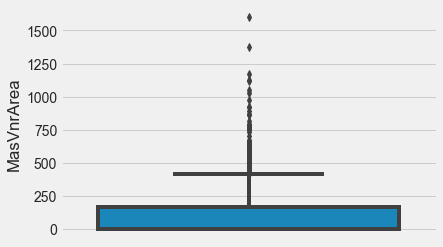

In [55]:
sns.boxplot(y=train["MasVnrArea"])
plt.show()

In [56]:
train2["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [57]:
train2["MasVnrType"].fillna("BrkFace",inplace=True)
train2["MasVnrArea"].fillna(value=166, inplace=True);

test["MasVnrType"].fillna("BrkFace",inplace=True)
test["MasVnrArea"].fillna(value=166, inplace=True);

In [58]:
train2[mas].isna().sum()

MasVnrArea    0
MasVnrType    0
dtype: int64

In [59]:
train2["GarageYrBlt"].mode()

0    2000.0
dtype: float64

In [60]:
train2["GarageYrBlt"].fillna(train2["GarageYrBlt"].mode()[0], inplace=True)
train2["Electrical"].fillna(train2["Electrical"].mode()[0], inplace=True);

test["GarageYrBlt"].fillna(test["GarageYrBlt"].mode()[0], inplace=True)
test["Electrical"].fillna(test["Electrical"].mode()[0], inplace=True)

In [61]:
train2["Electrical"].isna().sum(), test["GarageYrBlt"].isna().sum()

(0, 0)

In [62]:
sum(train2.isna().any()), sum(test.isna().any())

(0, 8)

In [63]:
int_to_object = ['MSSubClass','OverallQual','OverallCond','GarageCars']

train2[int_to_object].head()

MSSubClass OverallQual OverallCond GarageCars
0         60           7           5          2
1         20           6           8          2
2         60           7           5          2
3         70           7           5          3
4         60           8           5          3

In [64]:
train2[int_to_object].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1460 non-null   object
 1   OverallQual  1460 non-null   object
 2   OverallCond  1460 non-null   object
 3   GarageCars   1460 non-null   object
dtypes: object(4)
memory usage: 45.8+ KB


In [65]:
temp = list(test.isnull().sum())

col_type = list(test.dtypes)
lst = []
i=0
for col in test.columns:
    insert_lst= [col,col_type[i], temp[i]]
    lst.append(insert_lst)
    i+=1
    
test_na = pd.DataFrame(data=lst, columns=["Columns_Name", "Data_Types","Missing_Values"])

test_na_chart = test_na[test_na["Missing_Values"]>0].sort_values(by="Missing_Values", 
                                                 ascending=False).reset_index(drop=True)


test_na_chart.style.background_gradient("Reds")


In [66]:
list(test_na_chart["Columns_Name"])

['MSZoning',
 'Utilities',
 'Functional',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'GarageArea',
 'SaleType']

In [67]:
feature = ['MSZoning','Utilities','Functional','Exterior1st','Exterior2nd','KitchenQual','SaleType']

In [68]:
for feature in feature:
    test[feature]=test[feature].fillna(test[feature].mode()[0])

In [69]:
sum(test.isna().any())

1

# 5. Target Feature

In [70]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [71]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=train['SalePrice']),row=1,col=1)
fig.add_trace(go.Box(y=train['SalePrice'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box Plot")


In [72]:
discrete = []

for col in train2.columns:
    if train2[col].dtype=="int64" and len(train[col].unique()) <=15:
        discrete.append(col)

In [73]:
len(discrete)

10

In [74]:
for col in discrete:
    print("{} has {} unique values".format(col, len(train[col].unique())))

BsmtFullBath has 4 unique values
BsmtHalfBath has 3 unique values
FullBath has 4 unique values
HalfBath has 3 unique values
BedroomAbvGr has 8 unique values
KitchenAbvGr has 4 unique values
TotRmsAbvGrd has 12 unique values
Fireplaces has 4 unique values
MoSold has 12 unique values
YrSold has 5 unique values


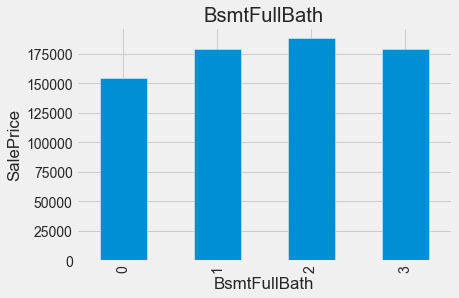

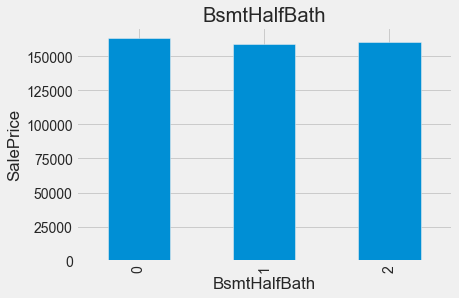

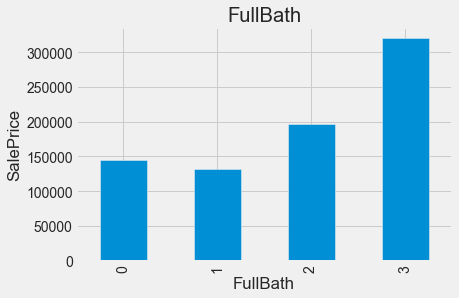

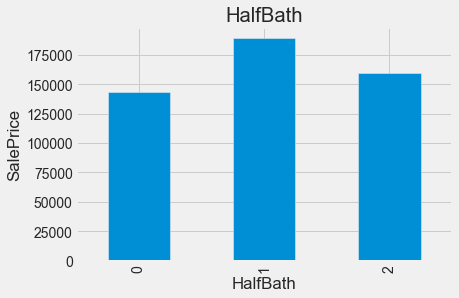

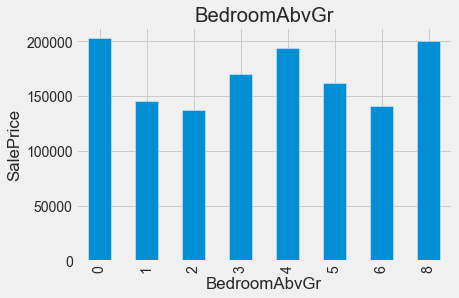

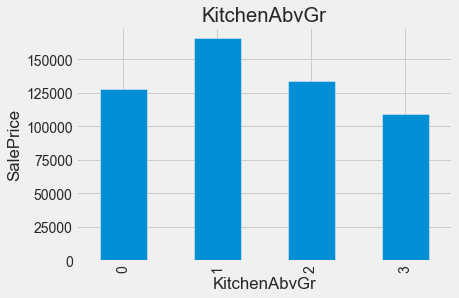

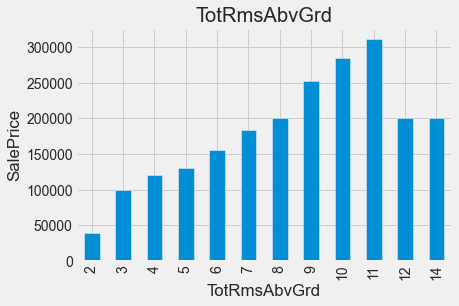

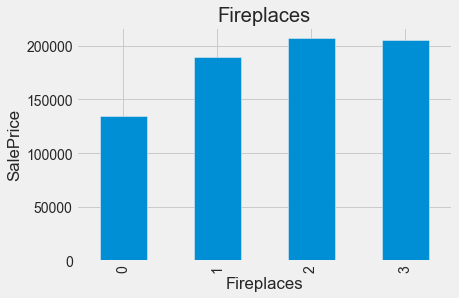

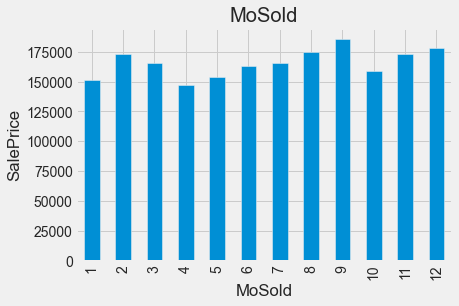

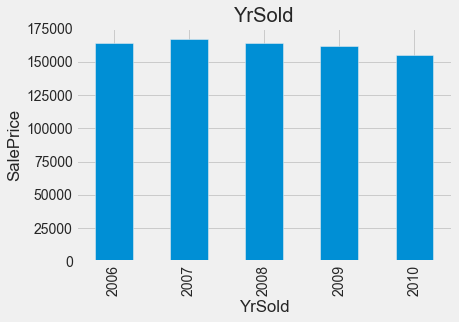

In [75]:
for feature in discrete:
    data = train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

### Countinious Feature

In [76]:
num_cont = []
for col in train.columns:
    if train[col].dtype=="int64"  and col not in year_feature and  col not in discrete and col not in int_to_object:
        num_cont.append(col)

In [77]:
len(num_cont)

17

In [78]:
print("Countinious feature has::\n\n{}".format(num_cont))

Countinious feature has::

['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


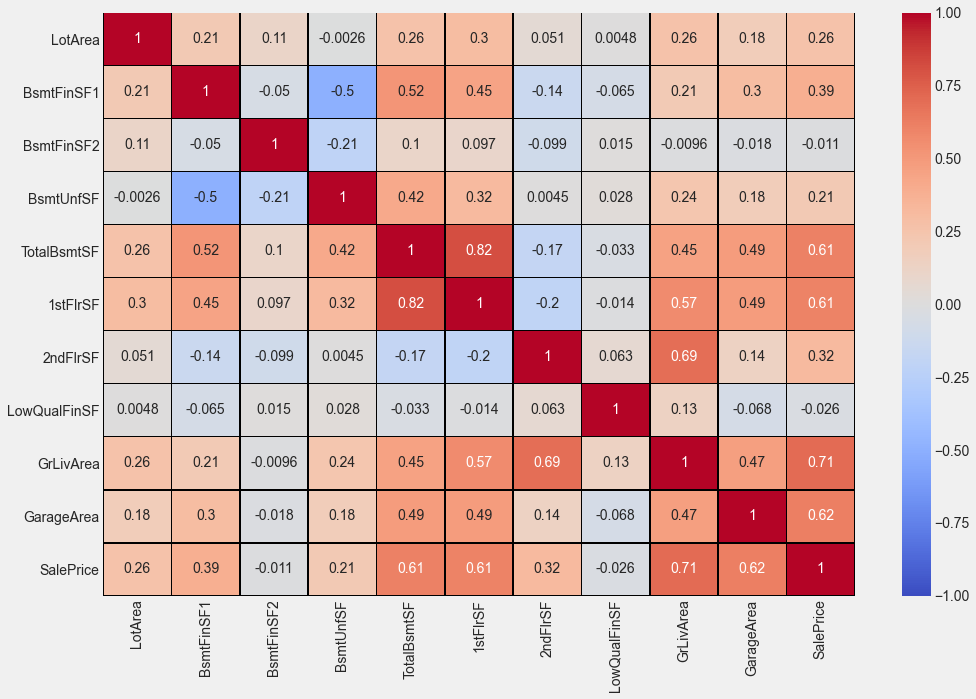

In [79]:
## HeatMAp

train_corr = train[num_cont].iloc[:,0:10]
train_corr["SalePrice"] = train["SalePrice"]
corr = train_corr.corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr, annot=True, linewidths=0.5, linecolor='black',cmap="coolwarm",vmin=-1,vmax=1,center=0)

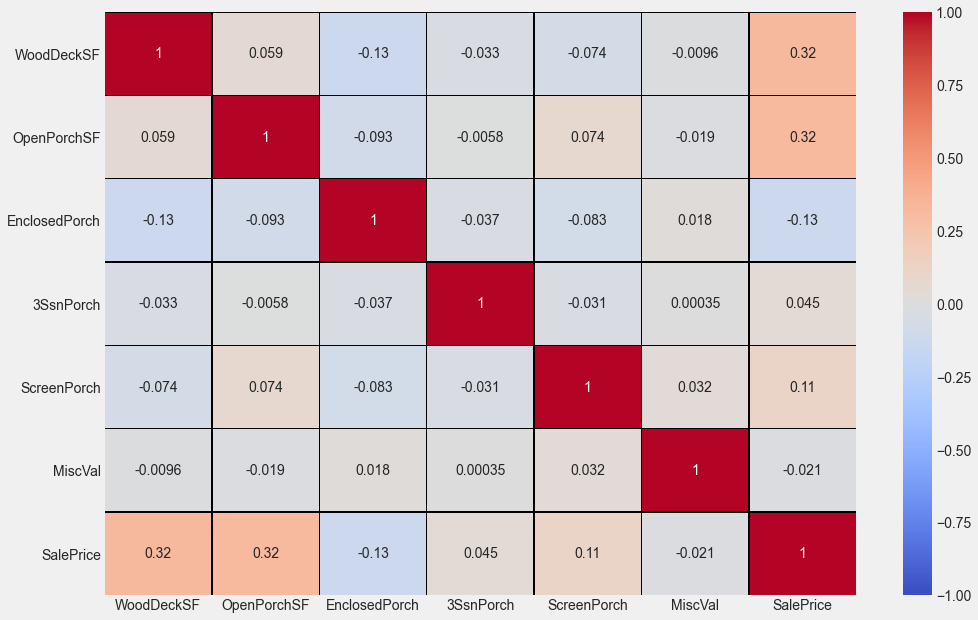

In [80]:
## HeatMAp

train_corr = train[num_cont].iloc[:,10:]
train_corr["SalePrice"] = train["SalePrice"]
corr = train_corr.corr()

plt.figure(figsize=(15,10))

sns.heatmap(corr, annot=True, linewidths=0.5, linecolor='black',cmap="coolwarm",vmin=-1,vmax=1,center=0)

In [81]:
fig = make_subplots(rows=2, cols=2)

features_to_examine = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']

i=0
for row in range(1,3):
    for col in range(1,3):
        fig.add_trace(go.Scatter(y=train['SalePrice'],x=train[features_to_examine[i]],name=features_to_examine[i],
                                mode='markers'),row=row,col=col)
        i+=1
fig.update_layout(height=1000, showlegend=True,title_text="Positive Correlated features with Sale Price")
fig.show()

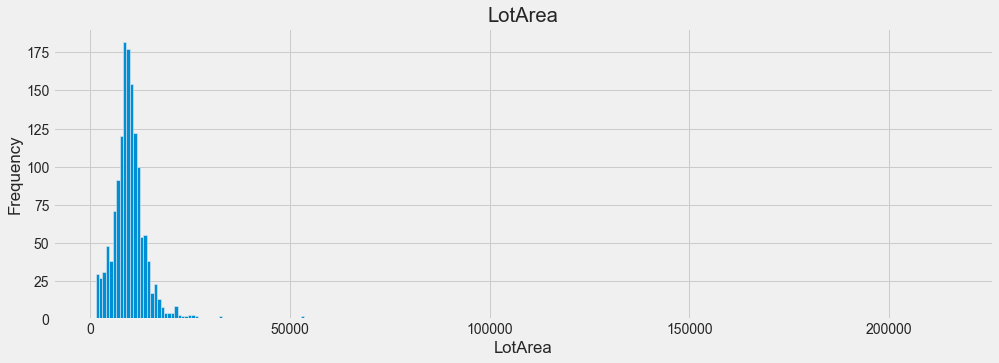

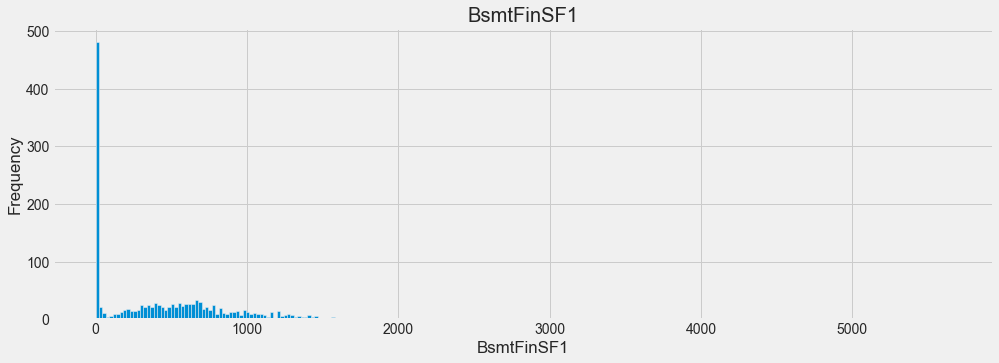

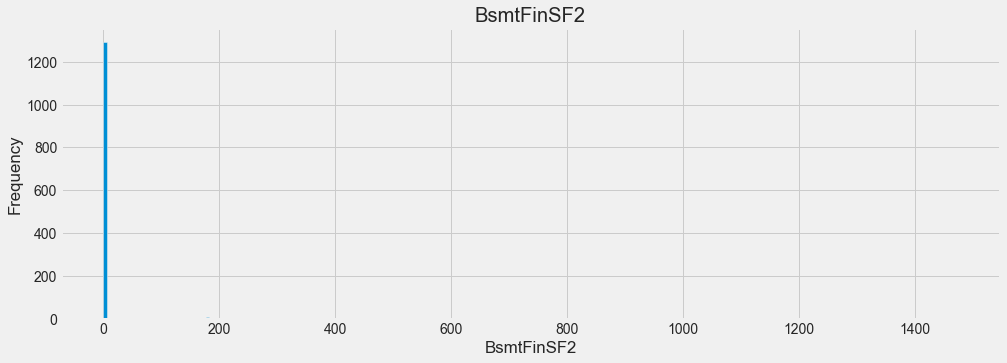

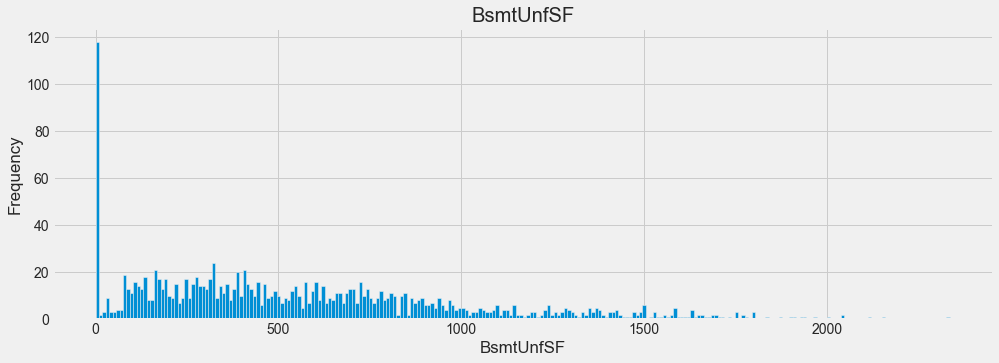

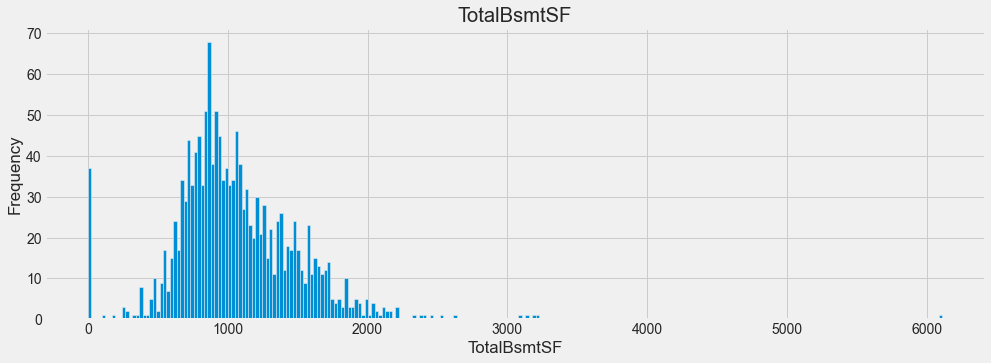

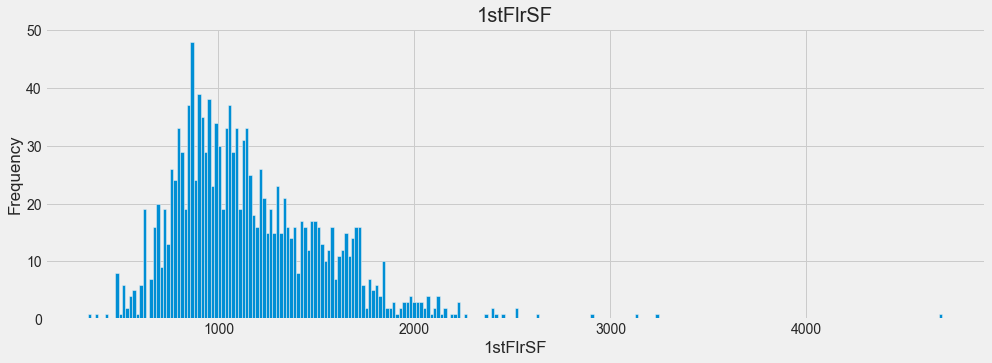

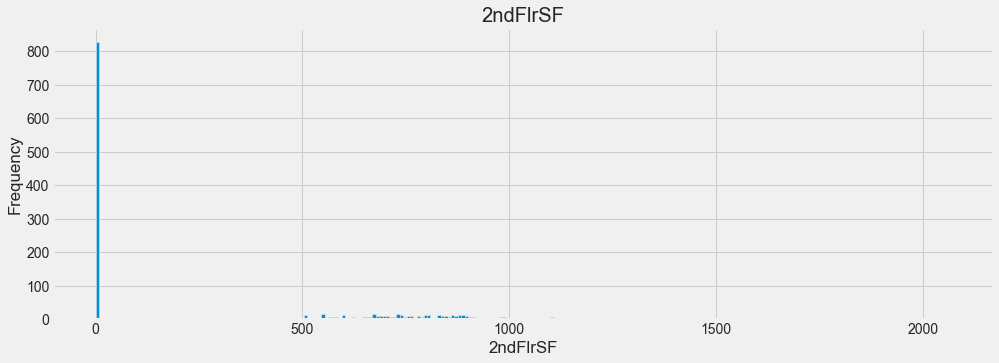

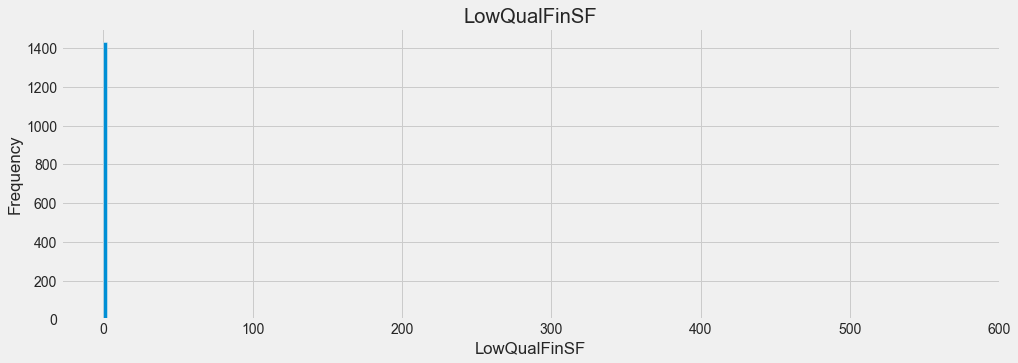

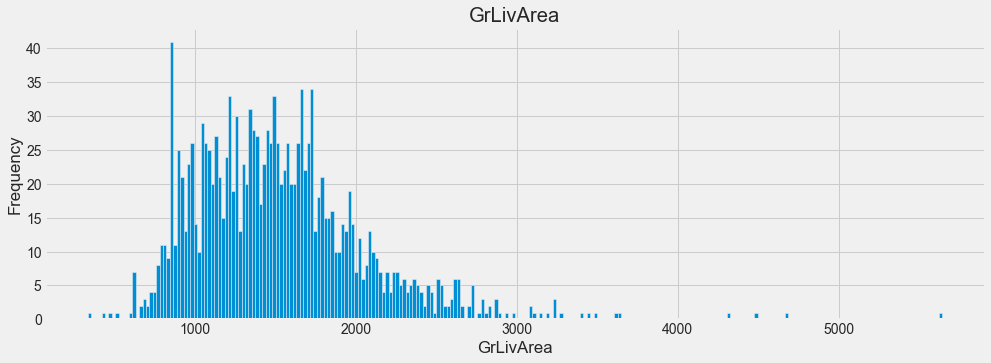

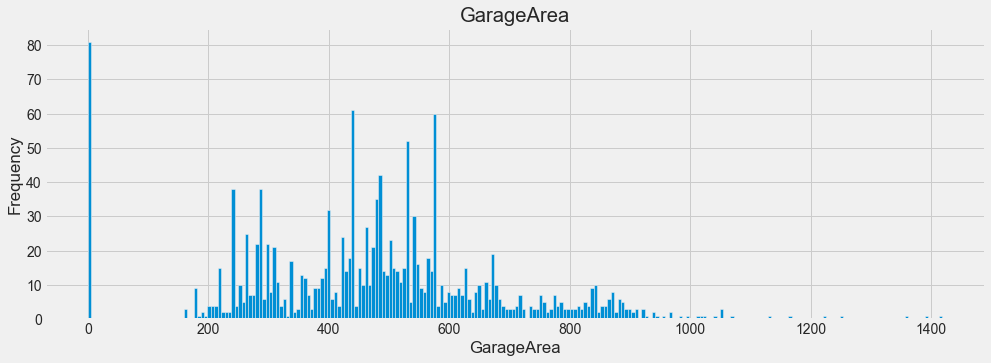

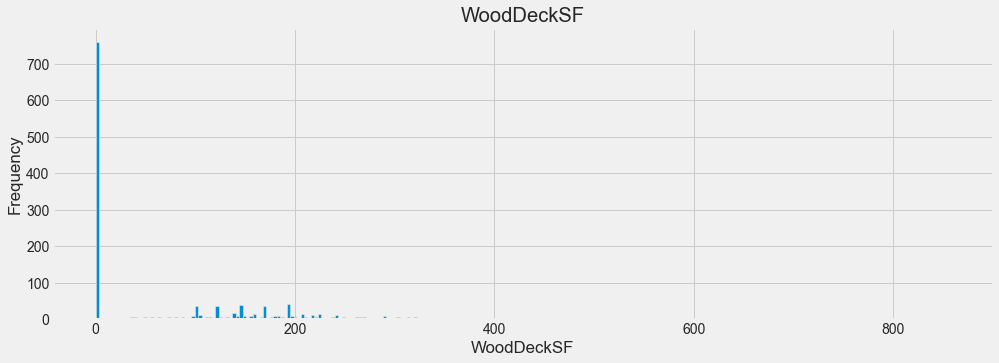

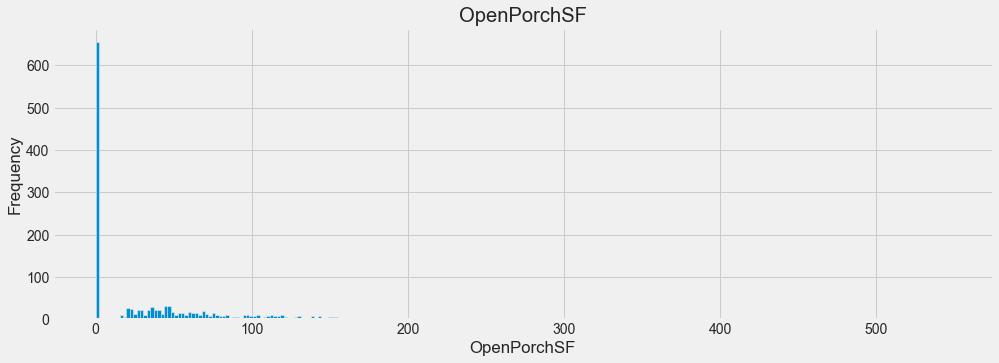

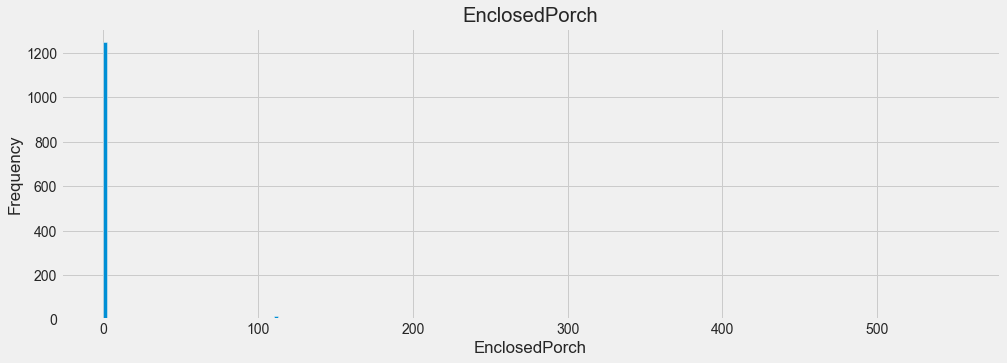

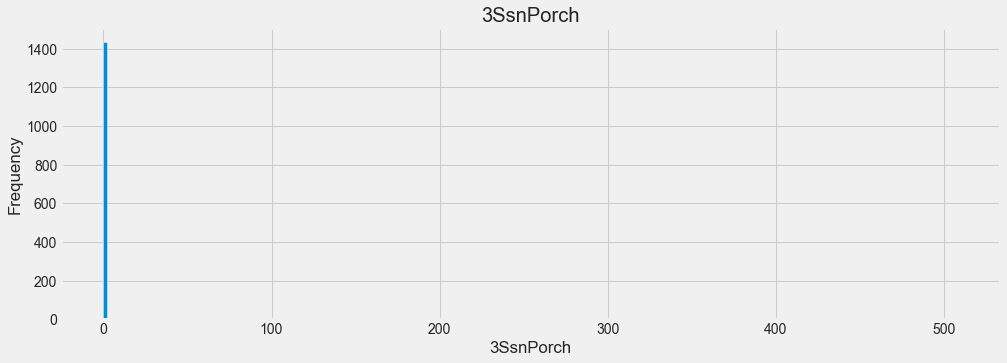

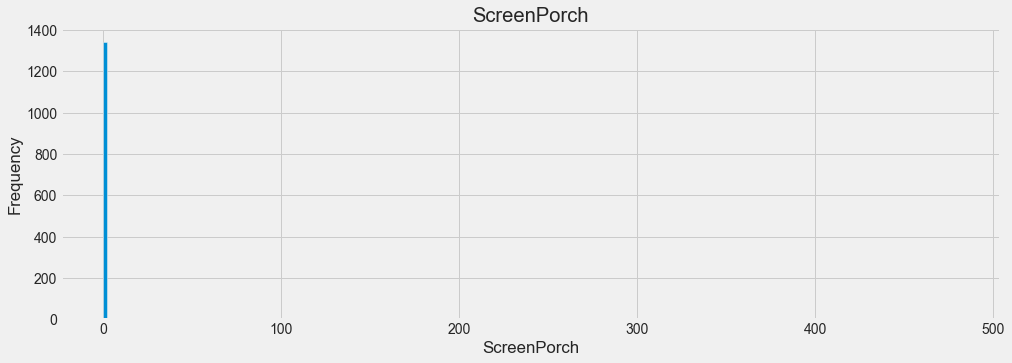

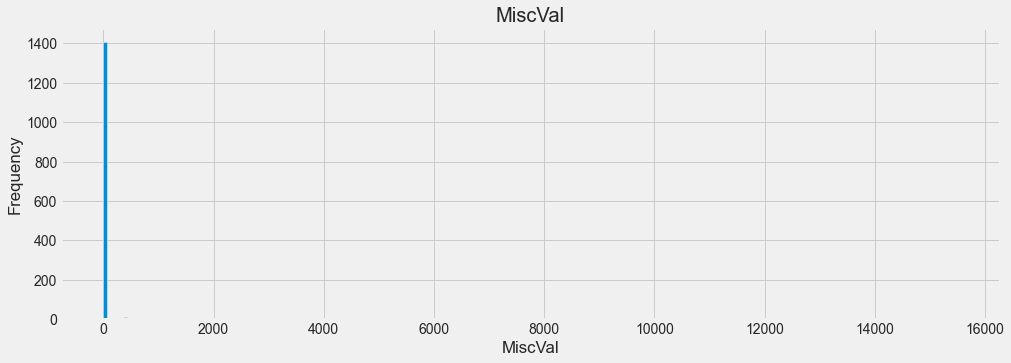

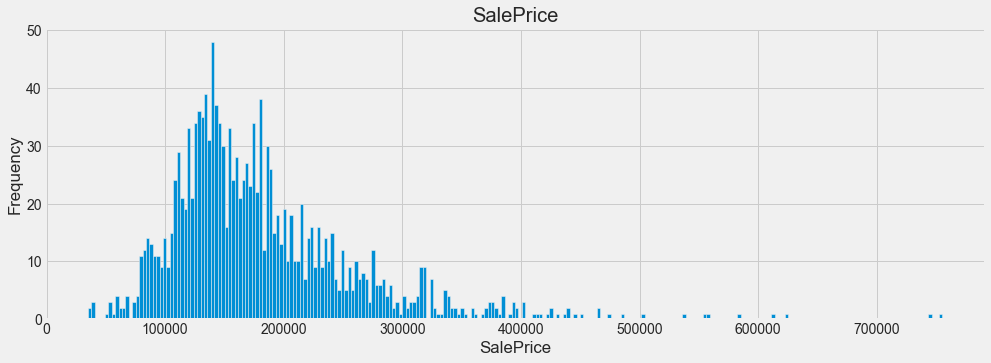

In [82]:
for feature in num_cont:
    data=train.copy()
    plt.figure(figsize=(15,5))
    data[feature].hist(bins=250)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(feature)
    plt.show()

# Categorical Feature

In [83]:
train_cat = train.copy()

In [84]:
train_cat[cat_feat]

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0            60       RL   Pave      Reg         Lvl    AllPub    Inside   
1            20       RL   Pave      Reg         Lvl    AllPub       FR2   
2            60       RL   Pave      IR1         Lvl    AllPub    Inside   
3            70       RL   Pave      IR1         Lvl    AllPub    Corner   
4            60       RL   Pave      IR1         Lvl    AllPub       FR2   
...         ...      ...    ...      ...         ...       ...       ...   
1455         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1456         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1457         70       RL   Pave      Reg         Lvl    AllPub    Inside   
1458         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1459         20       RL   Pave      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1          Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3          Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4          Gtl      NoRidge       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
1455       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
1456       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
1457       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
1458       Gtl        NAmes       Norm       Norm     1Fam     1Story   
1459       Gtl      Edwards       Norm       Norm     1Fam     1Story   

     OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0              7           5     Gable  CompShg     VinylSd     VinylSd   
1              6           8     Gable  CompShg     MetalSd     MetalSd   
2              7           5     Gable  CompShg     VinylSd     VinylSd   
3              7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4              8           5     Gable  CompShg     VinylSd     VinylSd   
...          ...         ...       ...      ...         ...         ...   
1455           6           5     Gable  CompShg     VinylSd     VinylSd   
1456           6           6     Gable  CompShg     Plywood     Plywood   
1457           7           9     Gable  CompShg     CemntBd     CmentBd   
1458           5           6       Hip  CompShg     MetalSd     MetalSd   
1459           5           6     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       BrkFace        Gd        TA      PConc       Gd       TA           No   
1          None        TA        TA     CBlock       Gd       TA           Gd   
2       BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3          None        TA        TA     BrkTil       TA       Gd           No   
4       BrkFace        Gd        TA      PConc       Gd       TA           Av   
...         ...       ...       ...        ...      ...      ...          ...   
1455       None        TA        TA      PConc       Gd       TA           No   
1456      Stone        TA        TA     CBlock       Gd       TA           No   
1457       None        Ex        Gd      Stone       TA       Gd           No   
1458       None        TA        TA     CBlock       TA       TA           Mn   
1459       None        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0             GLQ          Unf    GasA        Ex          Y      SBrkr   
1             ALQ          Unf    GasA        Ex          Y      SBrkr   
2             GLQ          Unf    GasA        Ex          Y      SBrkr   
3             ALQ          Unf    GasA       

In [85]:
print("Categorical Featurs are :\n\n{},{}".format(cat_feat,len(cat_feat)))

Categorical Featurs are :

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],43


### 1. 

In [86]:
train_cat["MSSubClass"] = train_cat["MSSubClass"].replace({20:'1_STORY_NEWER',
                                                    30:'1_STORY_OLDER',40:'1_STORY_ATTIC',
                                                    45:'1_1/2_UNFINISHED',
                                                    50:'1_1/2_FINISHED',60:'2_STORY_NEWER',
                                                    70:'2_STORY_OLDER',75:'2_1/2_STOPY',
                                                    80:'SPLIT/MULTILEVEL',85:'SPLIT_FOYER',
                                                    90:'DUPLEX',120:'1_STORY_PUD',
                                                    150:'1_1/2_STORY_PUD',
                                                    160:'2_STORY_PUD',
                                                    180:'PUD_MULTILEVEL',
                                                    190:'2_FAMILY_CONVERSION'})

#Covert to object
#train_df['MSSubClass'] = train_df['MSSubClass'].astype(object)

### 2.

In [87]:
cat2=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']

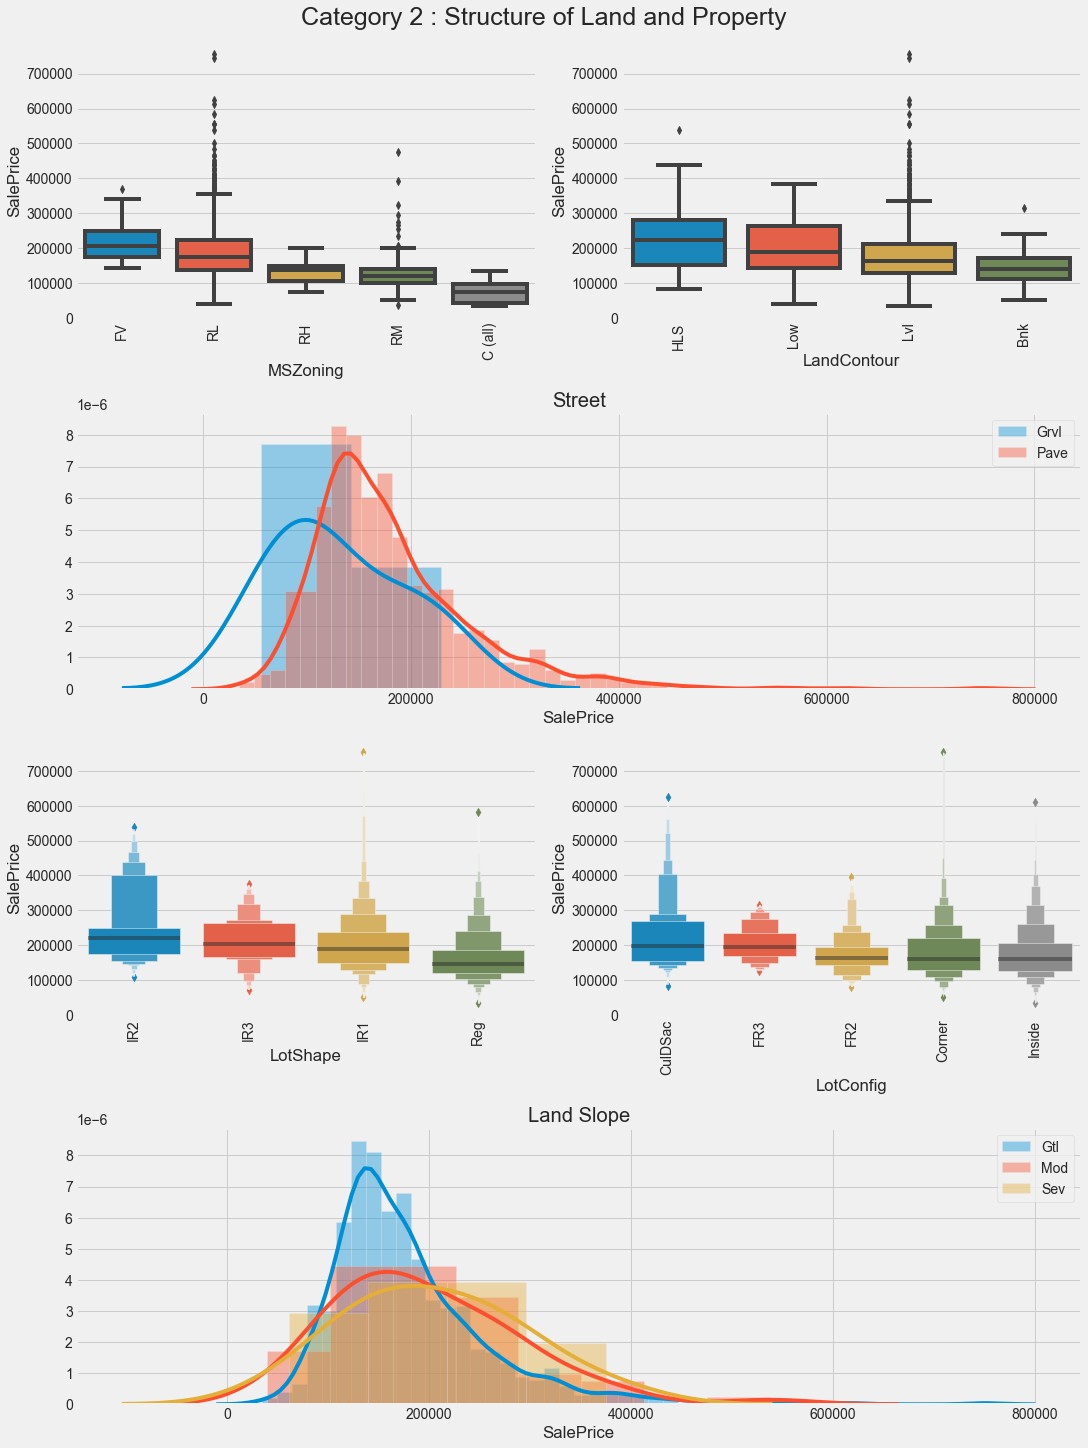

In [88]:
fig = plt.figure(constrained_layout=True, figsize=(15,20))
gs  = gridspec.GridSpec(4,2,fig)

plt.subplot(gs[0,0])
table = train_cat.groupby(["MSZoning"],as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False);
a1 = sns.boxplot(data=train_cat,x="MSZoning", y="SalePrice", order=table["MSZoning"].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)


plt.subplot(gs[0,1])
table = train_cat.groupby(['LandContour'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=train_cat,x='LandContour',y="SalePrice",order=table['LandContour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:])
a1 = sns.distplot(train_cat[train_cat['Street']=='Grvl']['SalePrice'])
a1 = sns.distplot(train_cat[train_cat['Street']=='Pave']['SalePrice'])
plt.legend('upper right' , labels = ['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table = train_cat.groupby(['LotShape'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=train_cat,x='LotShape',y="SalePrice",order=table['LotShape'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,1])
table = train_cat.groupby(['LotConfig'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=train_cat,x='LotConfig',y="SalePrice",order=table['LotConfig'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
a1 = sns.distplot(train_cat[train_cat['LandSlope']=='Gtl']['SalePrice'])
a1 = sns.distplot(train_cat[train_cat['LandSlope']=='Mod']['SalePrice'])
a1 = sns.distplot(train_cat[train_cat['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right' , labels = ['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

fig.suptitle("Category 2 : Structure of Land and Property",fontsize=25);

### 3. Overall Quality and Condition

In [89]:
train_cat['OverallQual'] = train_cat['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
train_cat['OverallQual'] = train_cat['OverallQual'].astype(object)

#OverallCond: Rates the overall condition of the house

train_cat['OverallCond'] = train_cat['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
train_cat['OverallCond'] = train_cat['OverallCond'].astype(object)

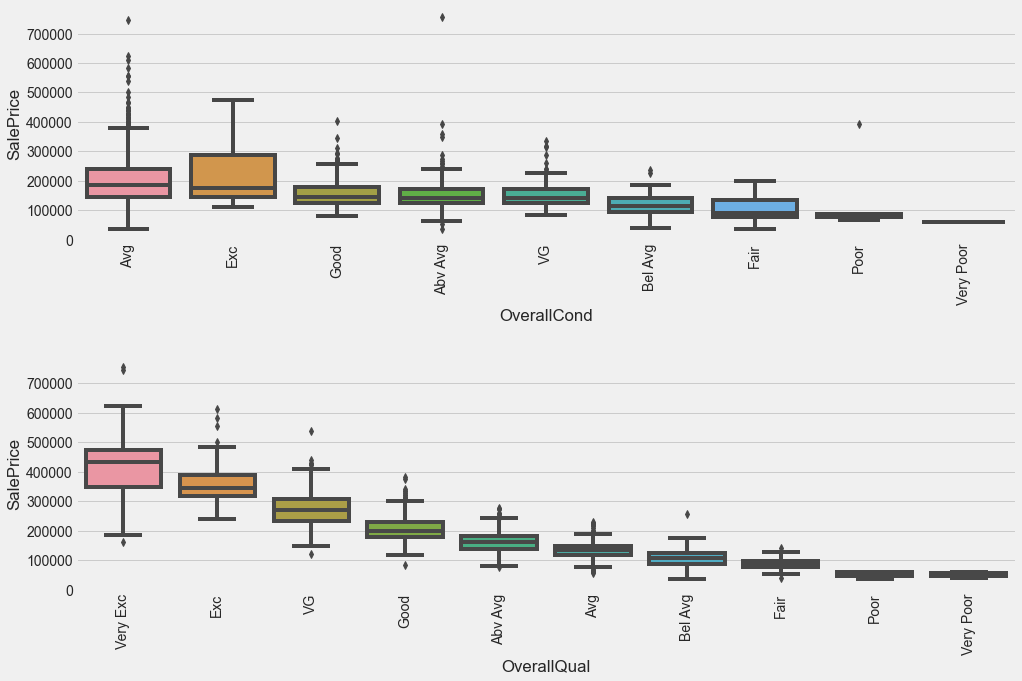

In [90]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
table = train_cat.groupby(["OverallCond"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.boxplot(data=train_cat, x="OverallCond", y="SalePrice",order=table["OverallCond"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);
#a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = train_cat.groupby(["OverallQual"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.boxplot(data=train_cat, x="OverallQual", y="SalePrice",order=table["OverallQual"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);


In [91]:
fig = px.histogram(train_cat, x="SalePrice", color='OverallQual',barmode="overlay",title="Overall Quality of the house")
fig.update_layout(height=500)
fig.show()

fig = px.histogram(train_cat, x="SalePrice", color='OverallCond',barmode="overlay",title="Overall Condition of the house")
fig.update_layout(height=500)
fig.show()

### 4.  Location and Style

In [92]:
cat2=['Neighborhood','Condition1', 'Condition2','Utilities','BldgType', 'HouseStyle']

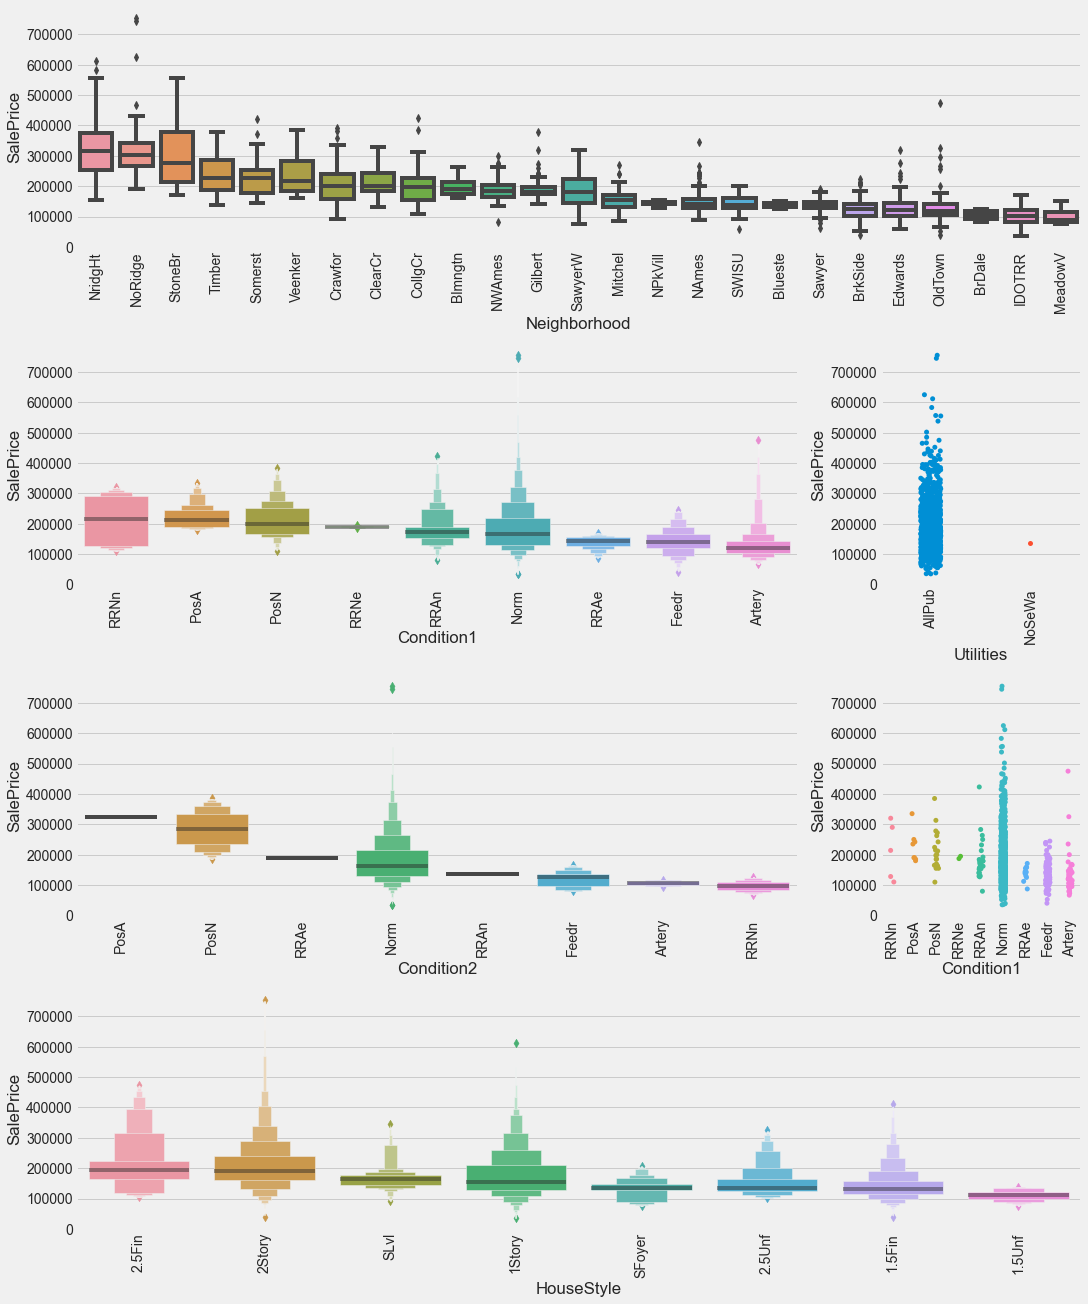

In [93]:
fig = plt.figure(constrained_layout=True, figsize=(15,18))
gs = GridSpec(4, 3, figure=fig)

plt.subplot(gs[0,:])
table = train_cat.groupby(["Neighborhood"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.boxplot(data=train_cat, x="Neighborhood", y="SalePrice",order=table["Neighborhood"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);

plt.subplot(gs[1,:-1])
table = train_cat.groupby(["Condition1"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.boxenplot(data=train_cat, x="Condition1", y="SalePrice",order=table["Condition1"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);

plt.subplot(gs[1,-1])
table = train_cat.groupby(["Utilities"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.stripplot(data=train_cat, x="Utilities", y="SalePrice",order=table["Utilities"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);



plt.subplot(gs[2,:-1])
table = train_cat.groupby(["Condition2"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.boxenplot(data=train_cat, x="Condition2", y="SalePrice",order=table["Condition2"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);


plt.subplot(gs[2,-1])
table = train_cat.groupby(["Condition1"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.stripplot(data=train_cat, x="Condition1", y="SalePrice",order=table["Condition1"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);

plt.subplot(gs[3,:])
table = train_cat.groupby(["HouseStyle"], as_index=False)["SalePrice"].median().sort_values(by="SalePrice", ascending=False)
a1 = sns.boxenplot(data=train_cat, x="HouseStyle", y="SalePrice",order=table["HouseStyle"].to_list())
a1.set_xticklabels(a1.get_xticklabels(),rotation=90);

In [94]:
for col in cat2:
    print("{} has {}".format(col,len(train[col].unique())))

Neighborhood has 25
Condition1 has 9
Condition2 has 8
Utilities has 2
BldgType has 5
HouseStyle has 8


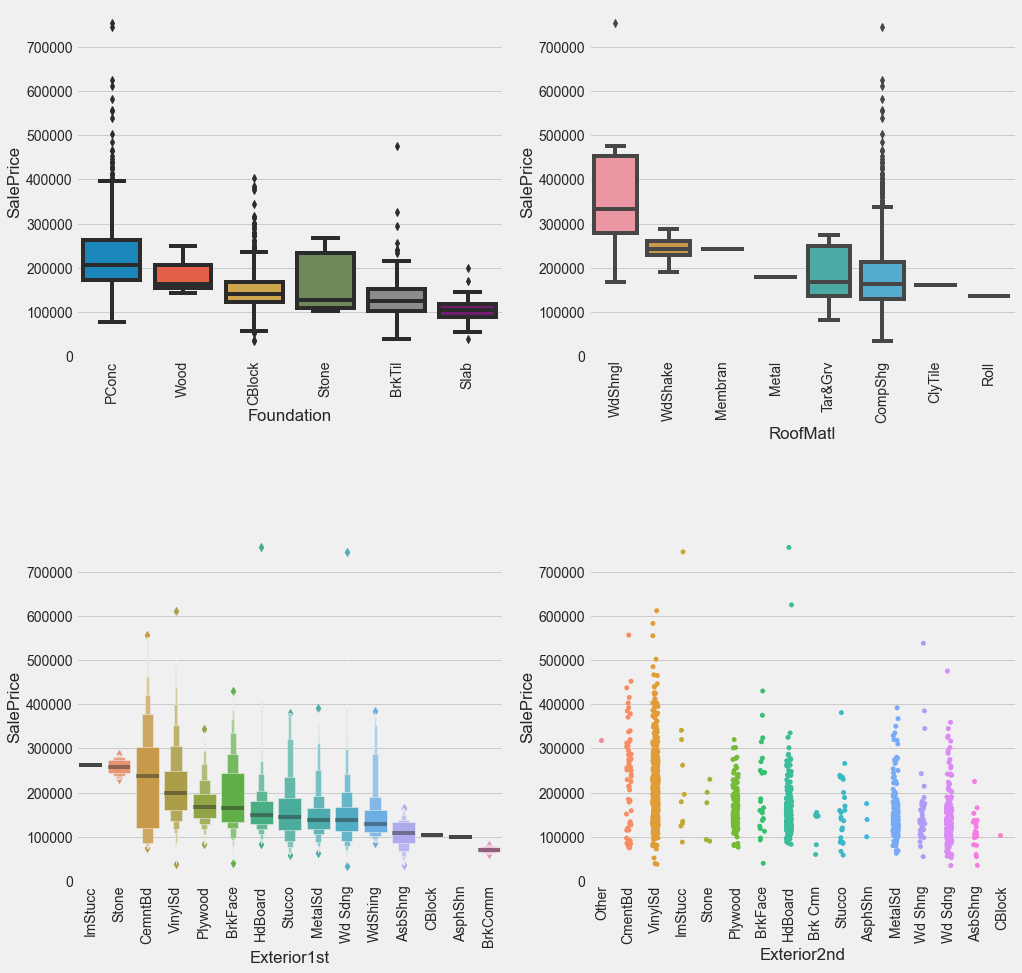

In [95]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
table = train_cat.groupby(['Foundation'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=train_cat,x='Foundation',y="SalePrice",order=table['Foundation'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,2)
table = train_cat.groupby(['RoofMatl'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=train_cat,x='RoofMatl',y="SalePrice",order=table['RoofMatl'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,3)
table = train_cat.groupby(['Exterior1st'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=train_cat,x='Exterior1st',y="SalePrice",order=table['Exterior1st'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,4)
table = train_cat.groupby(['Exterior2nd'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=train_cat,x='Exterior2nd',y="SalePrice",order=table['Exterior2nd'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

#plt.subplot(2,2,5)
fig = px.histogram(train_cat, x="SalePrice", color='RoofStyle',barmode="overlay",title='RoofStyle')
fig.update_layout(height=400)
fig.show()

#plt.subplot(2,2,6)
#fig = px.histogram(train_cat, x="SalePrice", color='MasVnrType',barmode="overlay",title="Mason Veneer Type")
#fig.update_layout(height=400)
#fig.show()

In [96]:
train_cat

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     2_STORY_NEWER       RL         65.0     8450   Pave      Reg   
1     1_STORY_NEWER       RL         80.0     9600   Pave      Reg   
2     2_STORY_NEWER       RL         68.0    11250   Pave      IR1   
3     2_STORY_OLDER       RL         60.0     9550   Pave      IR1   
4     2_STORY_NEWER       RL         84.0    14260   Pave      IR1   
...             ...      ...          ...      ...    ...      ...   
1455  2_STORY_NEWER       RL         62.0     7917   Pave      Reg   
1456  1_STORY_NEWER       RL         85.0    13175   Pave      Reg   
1457  2_STORY_OLDER       RL         66.0     9042   Pave      Reg   
1458  1_STORY_NEWER       RL         68.0     9717   Pave      Reg   
1459  1_STORY_NEWER       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0          Norm     1Fam     2Story        Good         Avg       2003   
1          Norm     1Fam     1Story     Abv Avg          VG       1976   
2          Norm     1Fam     2Story        Good         Avg       2001   
3          Norm     1Fam     2Story        Good         Avg       1915   
4          Norm     1Fam     2Story          VG         Avg       2000   
...         ...      ...        ...         ...         ...        ...   
1455       Norm     1Fam     2Story     Abv Avg         Avg       1999   
1456       Norm     1Fam     1Story     Abv Avg     Abv Avg       1978   
1457       Norm     1Fam     2Story        Good         Exc       1941   
1458       Norm     1Fam     1Story         Avg     Abv Avg       1950   
1459       Norm     1Fam     1Story         Avg     Abv Avg       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...          ...       ...       ...        ...      ...      .

In [97]:
fig = px.histogram(train_cat, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(train_cat, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()

## Just like this there are many other plot that help us to find the dependibilty of  

## Date Time Feature

In [98]:
train2[year_feature].head()

YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
0       2003          2003       2003.0       2    2008
1       1976          1976       1976.0       5    2007
2       2001          2002       2001.0       9    2008
3       1915          1970       1998.0       2    2006
4       2000          2000       2000.0      12    2008

In [99]:
year_feature1 = year_feature.copy()
year_feature1.remove("MoSold")

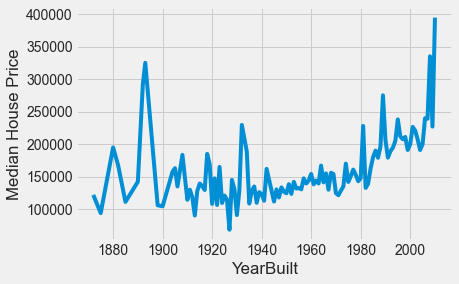

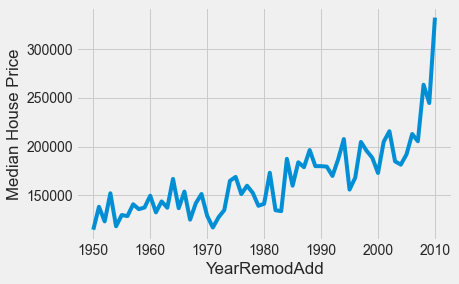

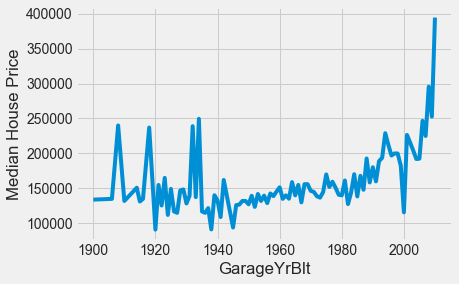

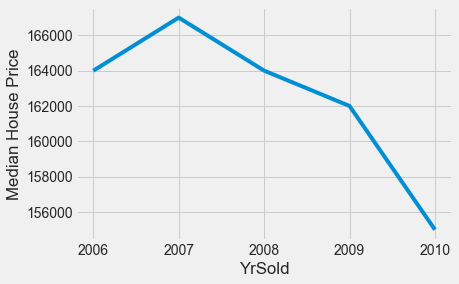

In [100]:
for col in year_feature1:
    data = train.copy()
    data.groupby(col)["SalePrice"].median().plot()
    plt.ylabel("Median House Price")
    plt.show();

In [101]:
# In 90's House Price is low and YrSold has a strange  behaviour
data = train.copy()

data["House_Life"] = data["YrSold"]-data["YearBuilt"]
ax = px.scatter(data,x="House_Life",y="SalePrice")
ax.show()

data["GarageLife"] = data["YrSold"]-data["GarageYrBlt"]
ax = px.scatter(data, x="GarageLife", y="SalePrice")
ax.show()

data["Renovation"] = data["YrSold"]-data["YearRemodAdd"]
ax = px.scatter(data,x="Renovation",y="SalePrice")
ax.show()

# Log Transformation of Skewed Curve

In [102]:
df = train2.copy()

In [103]:
object_to_int = int_to_object

for col in object_to_int:
    df[col] = df[col].astype("int64")
    test[col] = test[col].astype("int64")    

In [104]:
test["GarageCars"].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

In [105]:
df[object_to_int].dtypes

MSSubClass     int64
OverallQual    int64
OverallCond    int64
GarageCars     int64
dtype: object

In [106]:
train.skew().sort_values(ascending=False)       #.style.background_gradient("Reds")

MiscVal          24.476794
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
LotFrontage       2.409147
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.736919
dtype: float64

In [107]:
date_time = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

continuous=[]
for col in df.columns:
    if df[col].dtype!="O" and len(df[col].unique()) >16 and col not in date_time:
        continuous.append(col)
        
        
skewed = []
for col in continuous:
    if df[col].skew()!=0:
        skewed.append(col)
        
apply_log = []

for col in skewed:
    if 0 not in df[col].unique():
        apply_log.append(col)
        

        
#Before Applying log 
for col in apply_log:
    print("{} ----------   {}".format(col,df[col].skew()))
    
    
for col in apply_log:
    df[col] = np.log(df[col])
    
print("****\n\n{}".format("**"*20))
# After Applying Log
for col in apply_log:
    print("{}------    {}".format(col,df[col].skew()))

LotFrontage ----------   2.4091466665496006
LotArea ----------   12.207687851233496
1stFlrSF ----------   1.3767566220336365
GrLivArea ----------   1.3665603560164552
SalePrice ----------   1.8828757597682129
****

****************************************
LotFrontage------    -0.9091148013817885
LotArea------    -0.1379938086958118
1stFlrSF------    0.07915695223960692
GrLivArea------    -0.006995182187690808
SalePrice------    0.12133506220520406


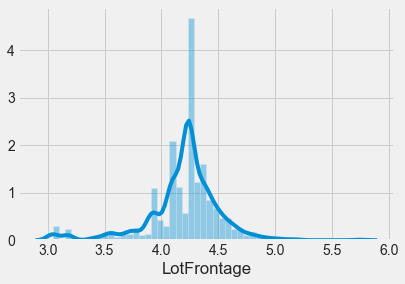

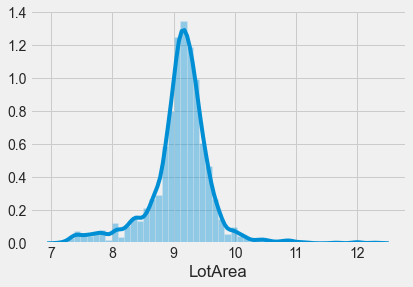

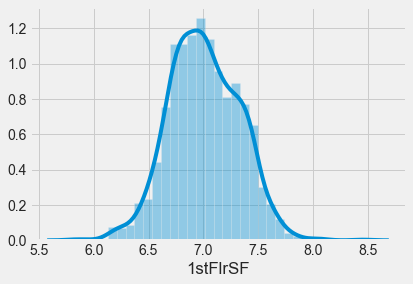

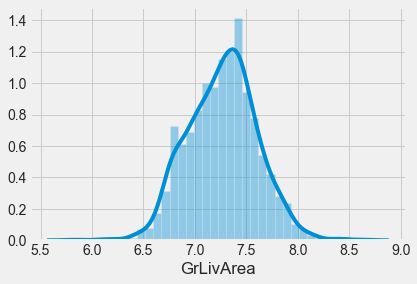

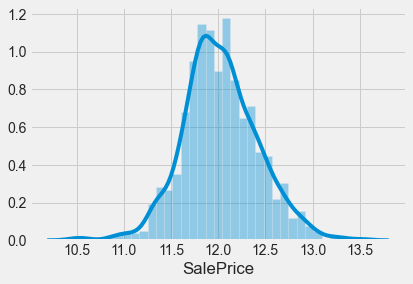

In [108]:
for feature in apply_log:
    sns.distplot(df[feature])
    plt.show()

# Labeling or Encoding

In [109]:
test[garage].isna().sum(),test[garage].dtypes

(GarageType      0
 GarageFinish    0
 GarageQual      0
 GarageCond      0
 dtype: int64,
 GarageType      object
 GarageFinish    object
 GarageQual      object
 GarageCond      object
 dtype: object)

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [111]:
df_train = df.copy()
df_test = test.copy()

In [112]:
int_to_object = ['MSSubClass', 'OverallQual', 'OverallCond', 'GarageCars']
for col in int_to_object:
    df_train[col]=df_train[col].astype(object)
    df_test[col]=df_test[col].astype(object)    

In [113]:
df_train[int_to_object].dtypes

MSSubClass     object
OverallQual    object
OverallCond    object
GarageCars     object
dtype: object

In [114]:
categorical = []

for col in df_train.columns:
    if df_train[col].dtype=="O":
        categorical.append(col)
        

In [115]:
for col in categorical:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])
    

In [116]:
garage

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [117]:
df_test[garage]

GarageType  GarageFinish  GarageQual  GarageCond
0              1             2           3           4
1              1             2           3           4
2              1             0           3           4
3              1             0           3           4
4              1             1           3           4
...          ...           ...         ...         ...
1454           6             3           4           5
1455           4             2           3           4
1456           5             2           3           4
1457           6             3           4           5
1458           1             0           3           4

[1459 rows x 4 columns]

In [118]:
df_test.isna().sum().sort_values(ascending=False)

GarageArea       1
SaleCondition    0
ExterQual        0
RoofStyle        0
RoofMatl         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
MSSubClass       0
Length: 74, dtype: int64

In [119]:
df_test["GarageArea"].fillna(df_test["GarageArea"].median(), inplace=True)

In [120]:
df_train[categorical]

MSSubClass  MSZoning  Street  LotShape  LandContour  Utilities  \
0              5         3       1         3            3          0   
1              0         3       1         3            3          0   
2              5         3       1         0            3          0   
3              6         3       1         0            3          0   
4              5         3       1         0            3          0   
...          ...       ...     ...       ...          ...        ...   
1455           5         3       1         3            3          0   
1456           0         3       1         3            3          0   
1457           6         3       1         3            3          0   
1458           0         3       1         3            3          0   
1459           0         3       1         3            3          0   

      LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0             4          0             5           2           2         0   
1             2          0            24           1           2         0   
2             4          0             5           2           2         0   
3             0          0             6           2           2         0   
4             2          0            15           2           2         0   
...         ...        ...           ...         ...         ...       ...   
1455          4          0             8           2           2         0   
1456          4          0            14           2           2         0   
1457          4          0             6           2           2         0   
1458          4          0            12           2           2         0   
1459          4          0             7           2           2         0   

      HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0              5            6            4          1         1           12   
1              2            5            7          1         1            8   
2              5            6            4          1         1           12   
3              5            6            4          1         1           13   
4              5            7            4          1         1           12   
...          ...          ...          ...        ...       ...          ...   
1455           5            5            4          1         1           12   
1456           2            5            5          1         1            9   
1457           5            6            8          1         1            5   
1458           2            4            5          3         1            8   
1459           2            4            5          1         1            6   

      Exterior2nd  MasVnrType  ExterQual  ExterCond  Foundation  BsmtQual  \
0              13           1          2          4           2         2   
1               8           2          3          4           1         2   
2              13           1          2          4           2         2   
3              15           2          3          4           0         4   
4              13           1          2          4           2         2   
...           ...         ...        ...        ...         ...       ...   
1455           13           2          3          4           2         2   
1456           10           3          3          4           1         2   
1457            5           2          0          2           4         4   
1458            8           2          3          4           1         4   
1459            6           2          2          4           1         4   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  \
0            4             4             2             6        1          0   
1            4             1             0             6        1          0   
2            4             2             2             6        1          0  

In [121]:
df_train[garage]

GarageType  GarageFinish  GarageQual  GarageCond
0              1             1           4           4
1              1             1           4           4
2              1             1           4           4
3              5             2           4           4
4              1             1           4           4
...          ...           ...         ...         ...
1455           1             1           4           4
1456           1             2           4           4
1457           1             1           4           4
1458           1             2           4           4
1459           1             0           4           4

[1460 rows x 4 columns]

# Feature Scalling

In [122]:
y_train = df_train["SalePrice"]
X_train = df_train.drop(columns=["SalePrice"], axis=1)
X_test = df_test


In [123]:
print("X_train::{}\n\n X_test::{}".format(X_train.shape, X_test.shape))

X_train::(1460, 74)

 X_test::(1459, 74)


In [124]:
X_train_columns = X_train.columns

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data=X_train,columns=[X_train_columns])

In [126]:
X_test_columns = X_test.columns


In [127]:
X_train.shape

(1460, 74)

In [128]:
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=[X_test_columns])

In [129]:
df_train[garage].columns

Index(['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'], dtype='object')

# Featuer Selection

In [130]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

feature_sel_model  = SelectFromModel(Lasso(alpha=0.005,random_state=42))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [131]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]
print(selected_feat)

MultiIndex([(     'LotShape',),
            (     'BldgType',),
            (  'OverallQual',),
            (    'YearBuilt',),
            ( 'YearRemodAdd',),
            (    'ExterQual',),
            (     'BsmtQual',),
            ( 'BsmtExposure',),
            ( 'BsmtFinType1',),
            (    'HeatingQC',),
            (   'CentralAir',),
            (     '1stFlrSF',),
            (    'GrLivArea',),
            (     'FullBath',),
            (  'KitchenQual',),
            (   'Fireplaces',),
            (   'GarageType',),
            ( 'GarageFinish',),
            (   'GarageCars',),
            (   'PavedDrive',),
            ('SaleCondition',)],
           )


In [132]:
X_train.shape

(1460, 74)

In [133]:
X_train = X_train[selected_feat].reset_index(drop=True)

In [134]:
X_train.shape

(1460, 21)

In [135]:
X_test = X_test[selected_feat]

# Model Building

**Linear Regression**

**Logistic Regression**

**XgBoost**

**Gradient Boosting**

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [137]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Gradient Boosting Regresor

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [142]:
def model_fit(alg, train, target_train, test, PerformCV=True, Print_Feature_Impt=True, cv_folds=5):
    # Algorithm Fit with train and test
    alg.fit(train,target_train)
    
    # Predict model
    train_pred = alg.predict(train)
    test_pred  = alg.predict(test)
    
    # Perform Cross-Validation
    if PerformCV:
        cv_score = cross_val_score(train, target_train, cv=cv_folds)
        
        # Print Performance of The Model
        print("Model Report")
        pritn("Accuracy on Training :: {}".format(alg.score(train,target_train)))
        #print("Accuracy in Testing :: {}".format(alg.score(test)))
        #print("Mean Absolute Error :: {}".format(mean_absolute_error(target_test,test_pred)))
        #print("Mean Squared Error :: {}".format(mean_squared_error(target_test, test_pred)))
        #print("Root Mean Squared Error :: {}".format(np.sqrt(mean_squared_error(target_test, test_pred))))
        
        
        if PerformCV:
            print("CV Score : Min-{} | Max-{} | Mean-{} | Std-{} .".format(np.min(cv_score),np.max(cv_score),np.mean(cv_score),np.std(cv_score)))
            
    if Print_Feature_Impt:
        feature_imp = alg._feature_importances_.tolist()
        feature_columns=  list(train.columns)
        Import_DF = pd.DataFrame({"Feature":feature_columns,"Importance":feature_imp})
        Import_DF = Import_DF.sort_values(by="Importance", ascending=False)
        
        
        fig = plt.figure(figsize=(15,10))
        fig = sns.barplot(data=Import_DF,x="Feature",y="Importance")
        plt.xticks(rotation=90)
        plt.title("Feature_Importance", fontsize=20)
        plt.xlabel("Feature",fontsize=15)
        plt.ylabel("Importance", fontsize=15)
        plt.show()

In [143]:
gbm0 = GradientBoostingRegressor(random_state=42)
model_fit(alg=gbm0, train=X_train,target_train=y_train,test=X_test)

TypeError: estimator should be an estimator implementing 'fit' method,      LotShape BldgType OverallQual YearBuilt YearRemodAdd ExterQual BsmtQual  \
0         1.0      0.0    0.666667  0.949275     0.883333  0.666667      0.5   
1         1.0      0.0    0.555556  0.753623     0.433333  1.000000      0.5   
2         0.0      0.0    0.666667  0.934783     0.866667  0.666667      0.5   
3         0.0      0.0    0.666667  0.311594     0.333333  1.000000      1.0   
4         0.0      0.0    0.777778  0.927536     0.833333  0.666667      0.5   
...       ...      ...         ...       ...          ...       ...      ...   
1455      1.0      0.0    0.555556  0.920290     0.833333  1.000000      0.5   
1456      1.0      0.0    0.555556  0.768116     0.633333  1.000000      0.5   
1457      1.0      0.0    0.666667  0.500000     0.933333  0.000000      1.0   
1458      1.0      0.0    0.444444  0.565217     0.766667  1.000000      1.0   
1459      1.0      0.0    0.444444  0.673913     0.250000  0.666667      1.0   

     BsmtExposure BsmtFinType1 HeatingQC CentralAir  1stFlrSF GrLivArea  \
0            1.00     0.333333       0.0        1.0  0.356155  0.577712   
1            0.25     0.000000       0.0        1.0  0.503056  0.470245   
2            0.50     0.333333       0.0        1.0  0.383441  0.593095   
3            1.00     0.000000       0.5        1.0  0.399941  0.579157   
4            0.00     0.333333       0.0        1.0  0.466237  0.666523   
...           ...          ...       ...        ...       ...       ...   
1455         1.00     1.000000       0.0        1.0  0.396777  0.564433   
1456         1.00     0.000000       1.0        1.0  0.690872  0.645810   
1457         1.00     0.333333       0.0        1.0  0.480189  0.688669   
1458         0.50     0.333333       0.5        1.0  0.443419  0.414497   
1459         1.00     0.166667       0.5        1.0  0.501253  0.468559   

      FullBath KitchenQual Fireplaces GarageType GarageFinish GarageCars  \
0     0.666667    0.666667   0.000000   0.166667     0.333333       0.50   
1     0.666667    1.000000   0.333333   0.166667     0.333333       0.50   
2     0.666667    0.666667   0.333333   0.166667     0.333333       0.50   
3     0.333333    0.666667   0.333333   0.833333     0.666667       0.75   
4     0.666667    0.666667   0.333333   0.166667     0.333333       0.75   
...        ...         ...        ...        ...          ...        ...   
1455  0.666667    1.000000   0.333333   0.166667     0.333333       0.50   
1456  0.666667    1.000000   0.666667   0.166667     0.666667       0.50   
1457  0.666667    0.666667   0.666667   0.166667     0.333333       0.25   
1458  0.333333    0.666667   0.000000   0.166667     0.666667       0.25   
1459  0.333333    1.000000   0.000000   0.166667     0.000000       0.25   

     PavedDrive SaleCondition  
0           1.0           0.8  
1           1.0           0.8  
2           1.0           0.8  
3           1.0           0.0  
4           1.0           0.8  
...         ...           ...  
1455        1.0           0.8  
1456        1.0           0.8  
1457        1.0           0.8  
1458        1.0           0.8  
1459        1.0           0.8  

[1460 rows x 21 columns] was passed

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_test.isna().sum().sort_values(ascending=False)